In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

import scienceplots
plt.style.use(['science', 'notebook', 'grid']) 
plt.rcParams['figure.figsize'] = [10, 10]

Sample from a spherically symmetric distribution of particles.

The quantile functions are:

$r(P) = RP^{1/3} \:$, where $R$ is the radius of the spherical distribution and $P \in [0,1]$ is the probability

$\phi(P) = 2\pi P$

$\theta(P) = \arccos(1-2P)$

In [2]:
N = int(1e2) # Number of particles
M = 1        # Total mass
m = M/N      # Mass of the single particles

r = np.random.uniform(0, 1, N)**(1/3)
phi = 2*np.pi*np.random.uniform(0, 1, N)
theta = np.arccos(1-2*np.random.uniform(0, 1, N))

Transform from spherical coordinates to Cartesian coordinates

In [3]:
x = r*np.sin(theta)*np.cos(phi)
y = r*np.sin(theta)*np.sin(phi)
z = r*np.cos(theta)

Plot the distribution of particles

Text(0.5, 0, 'z')

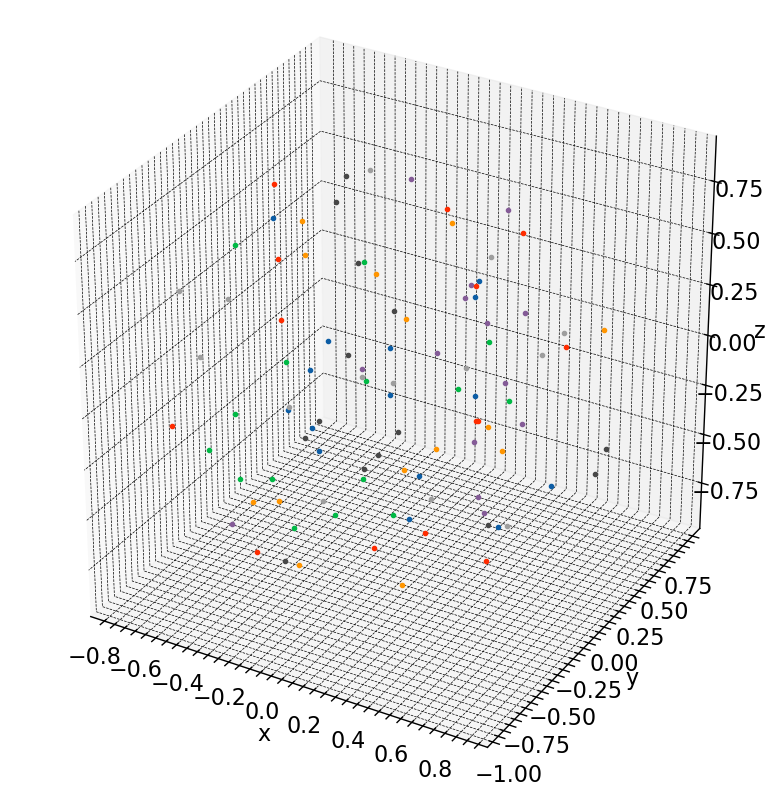

In [4]:
fig, ax = plt.subplots(subplot_kw={'projection':'3d'})

ax.set_box_aspect([1,1,1])

for i in range(len(x[:,])):
    ax.plot3D(x[i], y[i], z[i], 'o', markersize=3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

Create an input file for `nbody_sh1.C`

number_of_particles\
initial_time\
mass_1 x_1 y_1 z_1 vx_1 vy_1 vz_1\
mass_2 x_2 y_2 z_2 vx_2 vy_2 vz_2\
mass_3 x_3 y_3 z_3 vx_3 vy_3 vz_3\
...

In [5]:
file = open('sphere.in', 'w')

file.write(f'{N}\n')
file.write('0\n')
for i in range(N):
    file.write(f'{m} {x[i]} {y[i]} {z[i]} {0} {0} {0}\n')
file.close()